# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
### 
The Electric Mopeds dataset contains 8 columns and 1,500 rows.  Upon initial analysis, there are 150 missing values in the web browser column.

- Owned: Same as the description taking the form of a dummy variable with two values, 0 or 1.  No missing values.
- Make Model: Same as the description, no missing values and has 6 unique values, as stated in the description
- Review Month: Values don't match the description, there are various structures ranging from short format to short format with the day.  There are 12 different month names, but 332 unique values.  To clean, I extracted the last 3 characters of the string after the "-".  Confirmed that there are now 12 months in short format and NO missing values
- Web Browser: Same as description with 150 missing values, 6 different web browsers.  Almost half of the observations belong to Chrome.  The missing values in this column were replaced with "unknown"
- Reviewer Age: This column was a string datatype and needed to be an integer to satisfy the discrete variable type.  Although there were no NULLS, there were 105 values with the observation, '-', which I replaced with the average age which was just over 30.  I also validated that the minimum age was indeed 16.  36 different unique ages.
- Primary Use: Same as the description with no missing values, 2 primary uses.
- Value for Money: Different from the description as the data type is a string but needs to be a discrete variable.  I cleaned this column by stripping the elements before and after the "/" and assigning the first element to the value_for_money column.  There are no null values and 10 unique ratings.
- Overall Rating : Same as description without missing values.  The datatype is float which satisfies the description of being a continous variable

After completing the data validation process, the dataset contains 1500 rows, 8 columns, and no null values.

In [1]:
#EDA and Validation of Data
#Checking each individual variable

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np



### Loading the Data & Understanding the Variables Initially

In [2]:
#loading the data
df = pd.read_csv("electric_bike_ratings_2212.csv")
df.info()

#Understanding variables
variables_df = pd.DataFrame(columns = ['Variable','# of unique values','Values'])

for i, var in enumerate(df.columns):
    print(i,var)
    variables_df.loc[i] = [var,df[var].nunique(),df[var].unique().tolist()]

print(variables_df)
print(variables_df[['Variable','# of unique values']])

#view first 10 rows of data
display(df.head(10))
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
0 owned
1 make_model
2 review_month
3 web_browser
4 reviewer_age
5 primary_use
6 value_for_money
7 overall_rating
          Variable  ...                                             Values
0            owned  ...                                             [1, 0]
1       make_model  ...  [Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Ho...
2     review_month  ...  [Oct, J

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29
5,0,Lunna-Eyden,26-Aug,IE,47,Commuting,5/10,15.28
6,0,Lunna-Keetra,01-Mar,Chrome,20,Leisure,3/10,12.28
7,1,Nielah-Keetra,15-Mar,Chrome,32,Commuting,7/10,15.92
8,1,Nielah-Eyden,09-Mar,Chrome,35,Commuting,4/10,19.39
9,1,Nielah-Eyden,Jul,Firefox,22,Commuting,6/10,18.38


### Checking missing values in each of the 8 columns

In [3]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

### Analyze the Categorical Variables

In [4]:
col_list = ['make_model','review_month','web_browser','primary_use']

for item in col_list:
    print(df[item].value_counts())

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


Cleaning review_month and web_browser columns

In [5]:
#Extract the last 3 characters of the review_month column and check value_counts to ensure only 12 distinct values exist
df['review_month'] = (df.review_month.str[-3:])
print(df['review_month'].value_counts())

#Checking nulls exclusively for the web_browser column
print("There are ",df.web_browser.isna().sum()," null values in the web_browser column")
df['web_browser'] = df['web_browser'].fillna("unknown")

#Validate that null values in the web_browser were filled with "unknown"
df.info()
df.web_browser.value_counts()

Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64
There are  150  null values in the web_browser column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

Convert Reviewer_Age & Overall_Rating to Int Type & Analyze All Numerical Values

In [6]:
#First strip the string to the left of the '/' and convert to a discrete variable
df['value_for_money'] = (df.value_for_money.str.split('/').str[0]).astype(int)

#Analyze reviewer_age object before conversion to discrete variable, noticed '-' values
print(df['reviewer_age'].value_counts())

#Replace the '-' with a 0 before additional conversion and shaping
df['reviewer_age'] = df['reviewer_age'].replace('-',0)

#Convert column to integer type and replace values of zero with average age
df['reviewer_age'] = (df['reviewer_age'].astype(int))
average_age = df['reviewer_age'].mean()
df['reviewer_age'] = df['reviewer_age'].replace(0,average_age)

#Describe numerical variables & confirm that the reviewer_age column replacement worked with the average
print(df.describe())
print(df['reviewer_age'].value_counts())
print(df.reviewer_age.min())
df.info()

-     105
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
23     43
16     43
48     42
46     41
21     41
22     40
33     39
26     39
36     39
24     39
25     38
27     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64
             owned  reviewer_age  value_for_money  overall_rating
count  1500.000000   1500.000000      1500.000000     1500.000000
mean      0.593333     32.438120         4.977333       17.138907
std       0.491375      9.892748         1.486257        2.445566
min       0.000000     16.000000         1.000000       11.690000
25%       0.000000     24.000000         4.000000       15.320000
50%       1.000000     31.000000         5.000000       18.240000
75%       1.000000     41.000000         6.000000       18.840000
max       1.000000     50.000000        10.000000       22.760000
30.316    105

## Task 2

From the first graph, The Count of Owned, the category of 1, which means "owns the moped", has the most observations with 890 of them.  610 observations are from those who do not own the moped.  According to the below visual, it does not appear that the observations are perfectly balanced across the categories of the variable owned.
  

###  Analyzing the Owned and Review Columns

1    890
0    610
Name: owned, dtype: int64

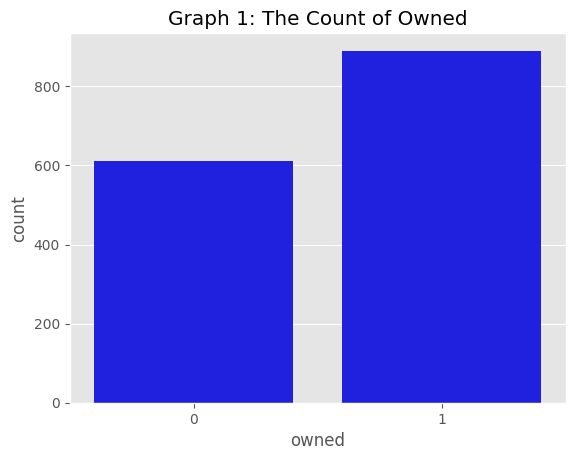

In [7]:
style.use('ggplot')
sns.countplot(x=df['owned'], color='blue').set(title='Graph 1: The Count of Owned')

df.owned.value_counts()

## Task 3
Overall rating is the target variable and I decided to apply a histogram to show the distribution and count of different overall ratings.  There are no extreme outliers in this visual.

[Text(0.5, 1.0, 'Graph 2: The Distribution of the Overall Rating Values'),
 Text(0.5, 0, 'Overall Rating'),
 Text(0, 0.5, 'Count of Ratings')]

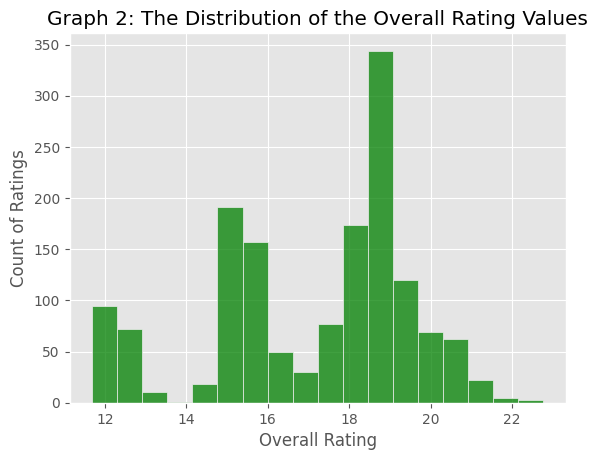

In [8]:
#Using a histplot to show the distribution of all possible values of the overall_rating column
sns.histplot(x=df['overall_rating'],color='green',common_norm = True).set(title='Graph 2: The Distribution of the Overall Rating Values',xlabel='Overall Rating', ylabel='Count of Ratings')


[Text(0.5, 1.0, 'Graph 3: The Distribution of the Overall Rating Values (Log Transformation)')]

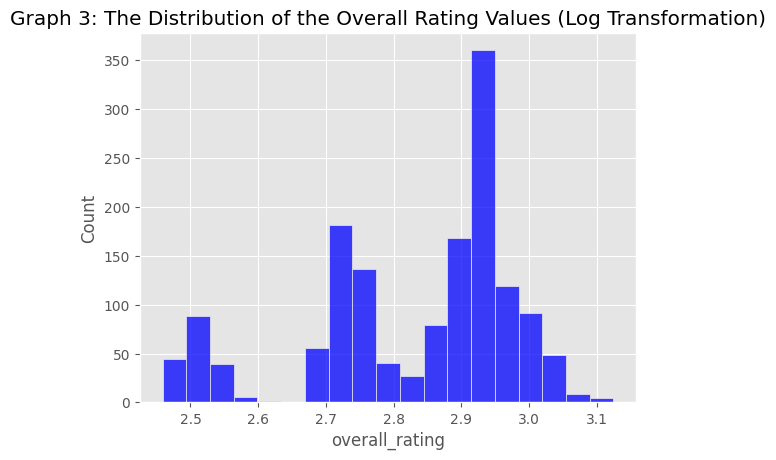

In [9]:
#Applying log transformation to see if we can get a distyribution that is closer to being normal
sns.histplot(x=np.log(df['overall_rating']),color='blue').set(title='Graph 3: The Distribution of the Overall Rating Values (Log Transformation)')

## Task 4
Graph 4 below shows a boxplot with the owned variable on the x axis and the overall_rating on the y axis.  The boxplot helps give insight to symmetry, skew, variance and other key important metrics.  There are no extreme outliers, so this visualization does a nice job to help interpret the relationship.  We can tell the min and max values for the overall_rating occur when the review is from someone who is an owner.  The range is largest for those in the "owned" category but the interquartile range is large for non-owners.

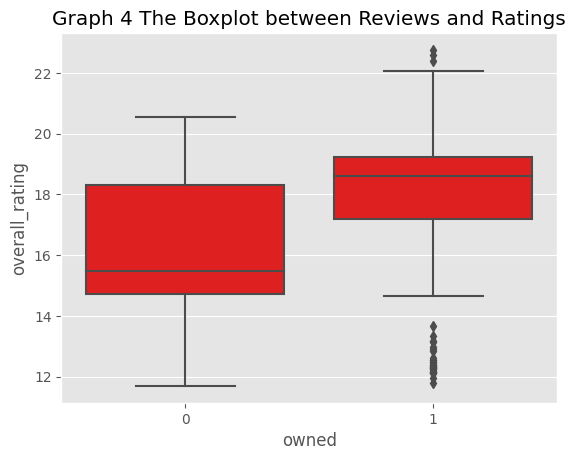

In [10]:
#Creating a standard boxplot to demonstrate the relationship, no heavy outliers
sns.boxplot(data=df, y='overall_rating',x='owned',color='red').set(title='Graph 4 The Boxplot between Reviews and Ratings');

### - ### Clean model more to help the model get a better fit

- Convert categorical variables to numeric variables
- Apply a transformation (log) to the target variable, in this case owned

In [11]:
#Get the features by dropping the target variable
features = df.drop(columns='owned')
df.info()

#Converting cat variables to num. variables
X=pd.get_dummies(features,columns = ['make_model','review_month','web_browser','primary_use'])

#Assigning target variable
y = df['owned']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   float64
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


## Task 5
Predicting whether a review came from an owner or not is a classification problem in machine learning

In [12]:
#import ML models and performance metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz



#split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

#Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Task 6
Baseline Model - Decision Tree Classifier with optimized performance using criterion 'entropy' and a max depth of '3'

In [13]:
#Looping through criterion and depths to optimize performance
for item in ['gini','entropy']:
    for i in range(1,10):
        clf = DecisionTreeClassifier(criterion=item, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print("Criterion: {}, Max Depth: {}, Accuracy:".format(item,i), metrics.accuracy_score(y_test,y_pred))
        
#Building the base model, Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_clf))
print(metrics.classification_report(y_test,y_pred_clf))


Criterion: gini, Max Depth: 1, Accuracy: 0.7288888888888889
Criterion: gini, Max Depth: 2, Accuracy: 0.7177777777777777
Criterion: gini, Max Depth: 3, Accuracy: 0.76
Criterion: gini, Max Depth: 4, Accuracy: 0.7622222222222222
Criterion: gini, Max Depth: 5, Accuracy: 0.7533333333333333
Criterion: gini, Max Depth: 6, Accuracy: 0.7355555555555555
Criterion: gini, Max Depth: 7, Accuracy: 0.7222222222222222
Criterion: gini, Max Depth: 8, Accuracy: 0.7066666666666667
Criterion: gini, Max Depth: 9, Accuracy: 0.6955555555555556
Criterion: entropy, Max Depth: 1, Accuracy: 0.7288888888888889
Criterion: entropy, Max Depth: 2, Accuracy: 0.7288888888888889
Criterion: entropy, Max Depth: 3, Accuracy: 0.7688888888888888
Criterion: entropy, Max Depth: 4, Accuracy: 0.7577777777777778
Criterion: entropy, Max Depth: 5, Accuracy: 0.7644444444444445
Criterion: entropy, Max Depth: 6, Accuracy: 0.7622222222222222
Criterion: entropy, Max Depth: 7, Accuracy: 0.7177777777777777
Criterion: entropy, Max Depth: 8,

## Task 7
Comparison Model - K-Nearest Neighbors Classification (KNN) and the accuracy score happens to be less than the Decision Tree Classifier model.

In [14]:
#Create KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the KNN Model
knn = knn.fit(X_train, y_train)

#Predict
y_pred_knn = knn.predict(X_test)
print(metrics.classification_report(y_test,y_pred_knn))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       179
           1       0.70      0.68      0.69       271

    accuracy                           0.63       450
   macro avg       0.62      0.62      0.62       450
weighted avg       0.64      0.63      0.63       450

Accuracy: 0.6333333333333333


## Task 8
I am choosing the Decision Tree Classifier because it is fairly simple to use and train as my base model.  The comparison model I chose was the KNN, which is another simple, yet elegant way to build and train a classification model.  It calculates new points based on the similarity between earlier stored data points.

## Task 9
I chose a combination of the accuracy score, classification report, and plotting the confusion matrix to evaluate and interpret the target variable.  This allows us to visaulize how the predicted and true labels match up by showing the predicted and actual values on different axes.  I also think it is powerful to see the false positives and false negatives that occur after running this algorithm.

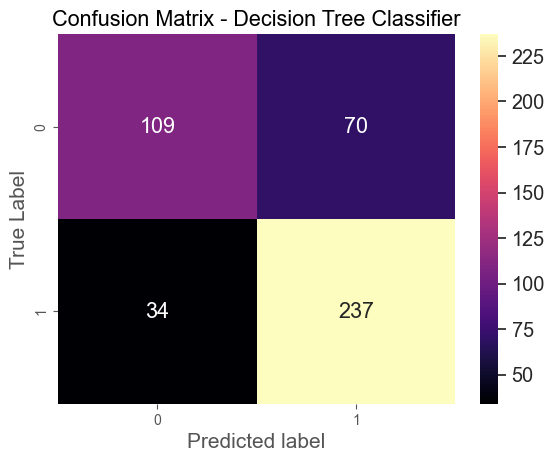

<Figure size 1000x700 with 0 Axes>

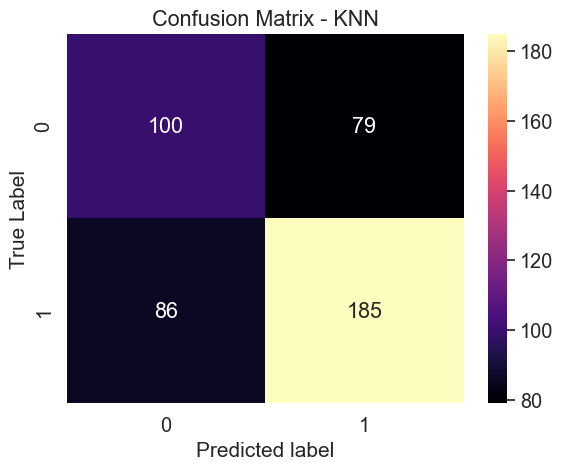

<Figure size 1000x700 with 0 Axes>

In [15]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt#get the confusion matrix
def show_confusion_matrix(y_test,y_pred,item):
    confusion_matrix = metrics.confusion_matrix(y_test,  
                                        y_pred)#turn this into a dataframe
    matrix_df = pd.DataFrame(confusion_matrix)#plot the result
    ax = plt.axes()
    sns.set(font_scale=1.3)
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
    title = 'Confusion Matrix - ' + item
    ax.set_title(title)
    ax.set_xlabel("Predicted label", fontsize =15)
    #ax.set_xticklabels(['']+labels)
    ax.set_ylabel("True Label", fontsize=15)
    #ax.set_yticklabels(list(labels), rotation = 0)
    plt.show()
    
show_confusion_matrix(y_test,y_pred_clf,'Decision Tree Classifier')
show_confusion_matrix(y_test,y_pred_knn,'KNN')

## Task 10
The decision tree classifier performed better with a higher overall accuracy score, better precision, recall, and an F1 score.  In addition, visually, one can tell that the decision tree classifier versus the KNN model produced less false positives and false negatives.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam